# ASTR 400B
## MW and M31 Halor Merger Remnant: Dark Matter Halo Density Evolution       

Question 1: 
- 1.1: What is the final density profile ?
- 1.2: Is it well fit by a Hernquist profile ?        
- 1.3: Is it more or less concetrated than the MW or M31 before they merged ?


# First Attempt on Code

In [1]:
# import relevant modules
import numpy as np
import astropy.units as u
import math 


# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from MassProfileMerger import MassProfileMerger

1.1 What is the final density profile ?

Plan: Locate the time of the merger event(6.5 Gyr from HW#6), identify the snapnumber corresponding to that time and onwards. Modify MassProfile function and CenterOfMass function in terms of MW+M31 merger 

In [2]:
# Create a mass profile object for the Merger using solution to Homework 5
# MassProfile for MW and M31 Merger at 3 different stages 

# Before Collision
MP_0 = MassProfile("MW",0)
# During Collision
MP_1 = MassProfileMerger("MW","M31",455)
# After Collision 
MP_2 = MassProfileMerger("MW","M31",801)

In [3]:
# Define an arrya of radii from 0.1 kpc to 300 kpc in increments of 0.1
R = np.arange(1,300,0.1)

In [4]:
# Mass Profile of Halo

# Before Collision
Mhalo_0 = MP_0.MassEnclosed(1,R)
# During Collision
Mhalo_1 = MP_1.MassEnclosed(1,R)
# After Collision
Mhalo_2 = MP_2.MassEnclosed(1,R)

1.2: Is it well fit by a Hernquist profile ?


$\rho(r) =  \frac{M_{halo}}{2\pi} \frac{a}{r(r+a)^3} \qquad M(r) =  \frac{M_{halo} r^2}{(a+r)^2}$ 

In [5]:
# From Lab 3:
# Function that returns the Hernquist profile
def Hernquist(r,a,Mhalo):
# Input:  Radius (kpc), Hernquist Scale Length (kpc), Total Mass (1e12 Msun)
# Defaults for scale length is 60 kpc, Default for Halo Mass is for MW from Assignment 3 
# Returns: Density in units of Msun/kpc^3
    return ((Mhalo*a)/(2*math.pi*r*(r+a)**3))

In [6]:
# Set Critical Density (rho_crit) as a Global Variable
rho_crit = 1.617e2 # units of (Msun/kpc^3)

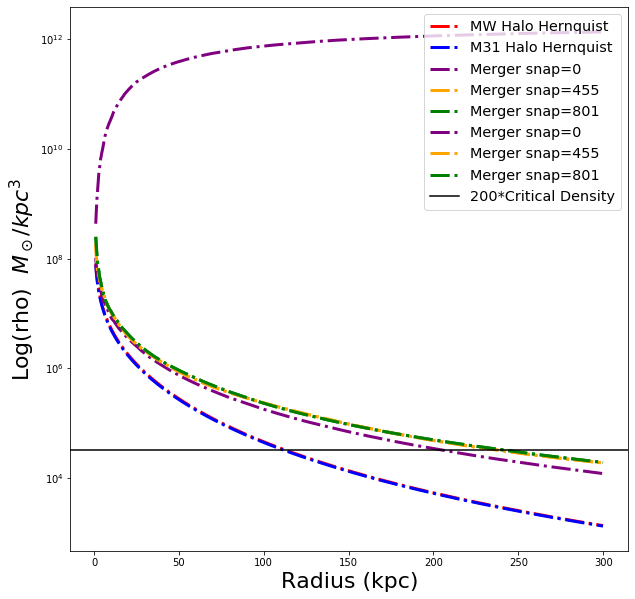

In [7]:
#From Lab 6:
# Plot the Halo Density Profile vs 
# the Hernquist profile
####################################

# Define an arrya of radii from 0.1 kpc to 300 kpc in increments of 0.1
# R = np.arange(0.1,300,0.1)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the halo luminosity density as a proxy for surface brighntess
#plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Halo Density')

# Hernquist Profile for MW
a_MW = 61 #(obtained from HW#5)
MW_Mhalo = 1.975e12*u.Msun #(obtained from HW#3)
plt.semilogy(R,Hernquist(R,a_MW,MW_Mhalo), color='red', linestyle="-.",linewidth=3, label='MW Halo Hernquist')

# Hernquist Profile for M31
a_M31 = 62 #(obtained from HW#5)
M31_Mhalo = 1.921e12*u.Msun #(obtained from HW#3)
plt.semilogy(R,Hernquist(R,a_M31,M31_Mhalo), color='blue', linestyle="-.",linewidth=3, label='M31 Halo Hernquist')

# Density Profile for Halo Merger Remnant
# Before Collision
plt.semilogy(R,Mhalo_0/((4/3)*np.pi*R**3), color='purple', linestyle="-.",linewidth=3, label='Merger snap=0')
# During Collision
plt.semilogy(R,Mhalo_1/((4/3)*np.pi*R**3), color='orange', linestyle="-.",linewidth=3, label='Merger snap=455')
# After Collision
plt.semilogy(R,Mhalo_2/((4/3)*np.pi*R**3), color='green', linestyle="-.",linewidth=3, label='Merger snap=801')

# Hernquist Density Profile for Halo Merger
# Before Collision
plt.semilogy(R,(Mhalo_0), color='purple', linestyle="-.",linewidth=3, label='Merger snap=0')
# During Collision
plt.semilogy(R,Mhalo_1/((4/3)*np.pi*R**3), color='orange', linestyle="-.",linewidth=3, label='Merger snap=455')
# After Collision
plt.semilogy(R,Mhalo_2/((4/3)*np.pi*R**3), color='green', linestyle="-.",linewidth=3, label='Merger snap=801')

# 200*Critical Denisty
plt.axhline(y=rho_crit*200, color = 'black', label = '200*Critical Density')



#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
#plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
plt.ylabel('Log(rho)  $M_\odot/kpc^3$', fontsize=22)




# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')



In [8]:
# Scale Length for MW+M31 Merger
# From Homework #5
# TESTING
###############

# test Radius
RR = 30

# array of radii, not starting at 0.
# intervales of 1 kpc
testR = np.arange(1,RR+1,1.0)

In [9]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
ScaleMerger = 60

# total Halo Mass from Merger (MW Halo Mass + M31 Halo Mass = Merger Halo Mass)
MtotMW = 1.975e12 
MtotM31 = 1.921e12 
MtotMerger = MtotMW + MtotM31

# Mass enclosed from simulation
MtestMerger = MP_0.MassEnclosed(1,testR)

#Mass enclosed from Hernquist Profile  
HtestMerger = np.round(MP_0.HernquistMass(RR,ScaleMerger,MtotMerger)/1e10,2)

# Circular Velocity using mass enclosed from simulation
#VtestMW = MW.CircularVelocity(1,testR)

# Circular Velocity from hernquist profile
#HVtestMW = MW.HernquistVCirc(RR,ScaleMW,MtotMW)

print("Testing MW at 30 kpc")
print("********************")
print("Scale Radius", ScaleMerger)
#print(np.round(MtestMerger[RR]/1e10),"x 1e10")
#print("Hernquist", HtestMerger, "x 1e10")
#print(" ")
#print(VtestMW[RR])
#print("Hernquist Vc",HVtestMW)



Testing MW at 30 kpc
********************
Scale Radius 60


KeyboardInterrupt: 

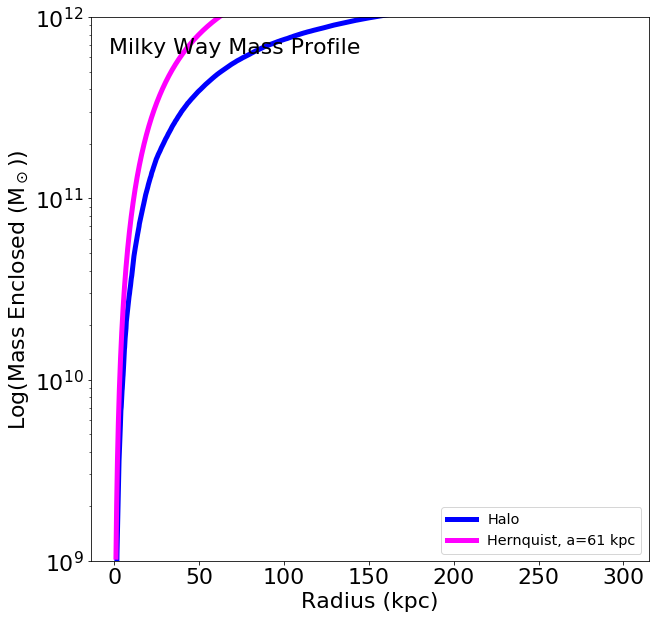

In [12]:
# Plot the Mass Profile for the MW.
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_0.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# TOTAL Mass
#plt.semilogy(R,MW.MassEnclosedTotal(R), color='black', linestyle="--",linewidth=5, label='Total')

# Hernquist Profile
plt.semilogy(R,MP_0.HernquistMass(R,ScaleMerger,MtotMerger), color='magenta',linewidth=5, label='Hernquist, a=61 kpc')


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e12)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
# do it this way!!: 
#plt.rcParams.update[{'font.size':20}]


# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Milky Way Mass Profile', fontsize=22)


# Save to a file
ax.set_rasterized(True)
plt.savefig('MassProfile_MW.eps', rasterized=True, dpi=350)

1.3: Is it more or less concetrated than the MW or M31 before they merged ?

Concentration Pararmeter,

$c =  \frac{R_{200}}{R_{scale}}$


In [ ]:
# Function that returns R_200 (Edge of the Galaxy); radius where the density = 200 times the critical density of the universe
def R_200(M):
    """
    Inputs: Mass of the galaxy
    Returns: R_200, radius at the edge of the galaxy
    """
    
    #return ((3*M)/(800*math.pi*rho_crit))**0.33

In [ ]:
# Plot the Mass Profile for the Merger.
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MW.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# for Disk
plt.semilogy(R,MW.MassEnclosed(2,R), color='red', linestyle=":", linewidth=3, label='Disk')

# for bulge
plt.semilogy(R,MW.MassEnclosed(3,R), color='green', linestyle="-.",linewidth=3, label='Bulge')

# TOTAL Mass
plt.semilogy(R,MW.MassEnclosedTotal(R), color='black', linestyle="--",linewidth=5, label='Total')

# Hernquist Profile
plt.semilogy(R,MW.HernquistMass(R,ScaleMW,MtotMW), color='magenta',linewidth=5, label='Hernquist, a=61 kpc')


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e12)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
# do it this way!!: 
#plt.rcParams.update[{'font.size':20}]


# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Milky Way Mass Profile', fontsize=22)


# Save to a file
ax.set_rasterized(True)
plt.savefig('MassProfile_MW.eps', rasterized=True, dpi=350)

In [ ]:
# Function that returns the Concetration Parameter of the galaxy
def Concentration(galaxy):
    """
    Inputs: galaxy, the galaxy filename
    Returns: Concentration Parameter of the galaxy system
    """
    # Concentration Parameter, c = R_200 / a 
    # where R_200 is the Edge of the Galaxy
    #       a is the Scale Length
    
    
    return c
    

In [ ]:
# Compare to see Concentration Parameters of Merger, MW, and M31